In [1]:
from moabb.datasets import BNCI2014_001
from moabb.paradigms import MotorImagery

dataset = BNCI2014_001()

#data = dataset.get_data()

paradigm = MotorImagery()

X, y, metadata = paradigm.get_data(dataset=dataset)

Choosing from all possible events
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets

In [2]:
import torch
from shallowDict import ShallowPrivateCollapsedDictNetSlow

# Initialize the model architecture
convDictionaryModel = ShallowPrivateCollapsedDictNetSlow(22,4)

# Load the saved state dictionary
state_dict = torch.load('results_42_BNCI2014-001/ShallowPrivateCollapsedDictNetSlow/Models_AllRuns/BNCI2014-001/mixed/ShallowPrivateCollapsedDictNetSlow_ShallowPrivateCollapsedDictNetSlow_braindecode_example/eegclassifier_fitted_0_model.pkl',map_location=torch.device('cpu'))

# Load the state dictionary into the model
convDictionaryModel.load_state_dict(state_dict)

# Put the model in evaluation mode
convDictionaryModel.eval()



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


ShallowPrivateCollapsedDictNetSlow(
  (spatio_temporal_layers): ModuleDict(
    (subject_1): Conv2d(22, 40, kernel_size=(1, 25), stride=(1, 1))
    (subject_2): Conv2d(22, 40, kernel_size=(1, 25), stride=(1, 1))
    (subject_3): Conv2d(22, 40, kernel_size=(1, 25), stride=(1, 1))
    (subject_4): Conv2d(22, 40, kernel_size=(1, 25), stride=(1, 1))
    (subject_5): Conv2d(22, 40, kernel_size=(1, 25), stride=(1, 1))
    (subject_6): Conv2d(22, 40, kernel_size=(1, 25), stride=(1, 1))
    (subject_7): Conv2d(22, 40, kernel_size=(1, 25), stride=(1, 1))
    (subject_8): Conv2d(22, 40, kernel_size=(1, 25), stride=(1, 1))
    (subject_9): Conv2d(22, 40, kernel_size=(1, 25), stride=(1, 1))
  )
  (pool): AvgPool2d(kernel_size=(1, 100), stride=(1, 100), padding=0)
  (instance_norm): InstanceNorm2d(40, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): LazyLinear(in_features=0, out_features=4, bias=True)
)

In [3]:
def visualize_eeg_weights(data, isSqueezed=False, kernel_number = 0):
    """
    Visualizes EEG-like data, where data is assumed to be in the shape (epochs, channels, 1, time_points).

    Args:
    - data (tensor/ndarray): Tensor-like data in the shape (epochs, channels, 1, time_points)
    """
    import matplotlib.pyplot as plt

    # Average across the first dimension (epochs) to get average channel response
    kernel_data = data[kernel_number]
    #avg_channel_data = data.mean(axis=0)

    # Plot each channel
    plt.figure(figsize=(15, 10))
    for i in range(kernel_data.shape[0]):  # Iterate through channels
        if isSqueezed:
           # plt.plot(kernel_data[i][0], label=f'Channel {i+1}')
            plt.plot(kernel_data[i][0], label=f'Channel {i+1}')
        else:
            plt.plot(kernel_data[i], label=f'Channel {i+1}')

    plt.title('Simulated EEG Channel Data Visualization')
    plt.xlabel('Time Points')
    plt.ylabel('Amplitude')
    plt.legend(loc="upper right", ncol=3, fontsize=8)
    plt.show()

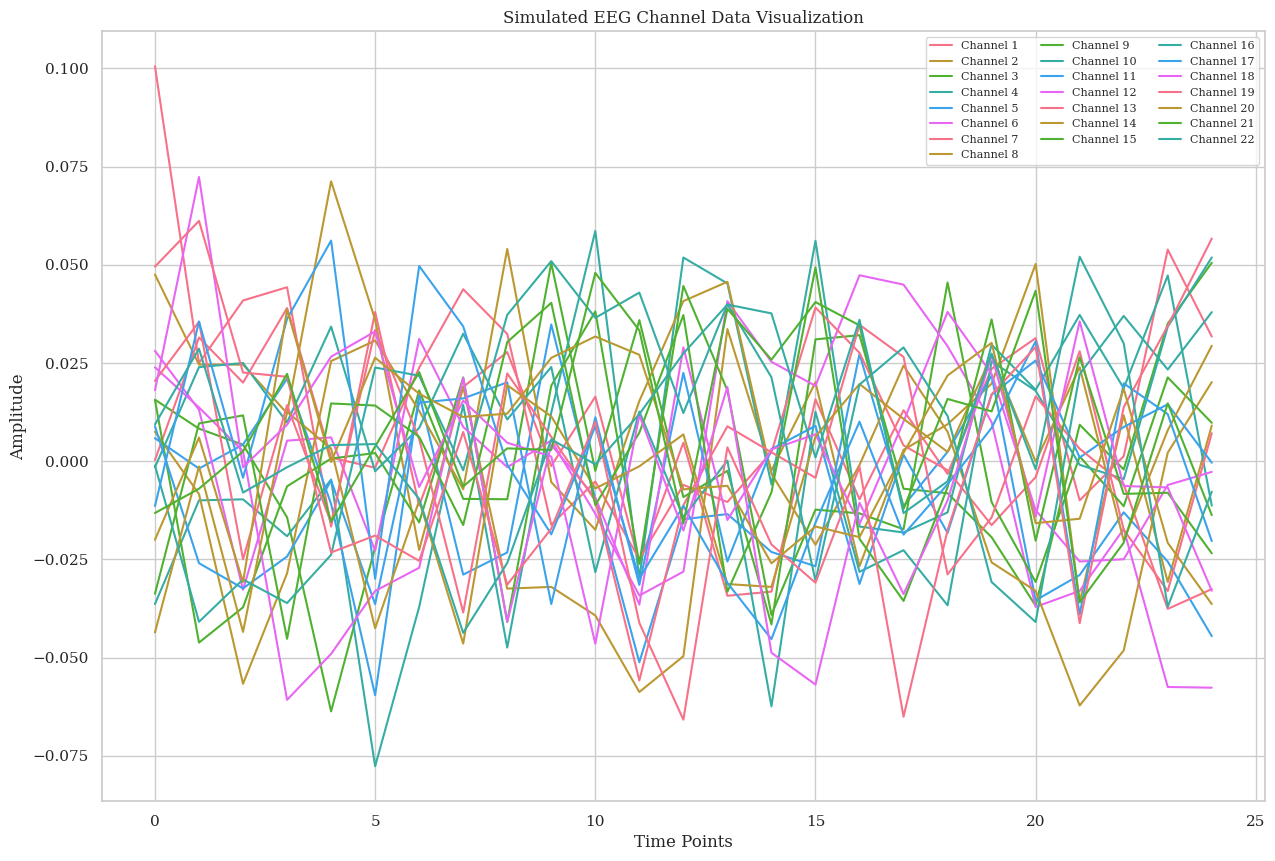

In [4]:
visualize_eeg_weights(convDictionaryModel.spatio_temporal_layers['subject_9'].weight.data, isSqueezed=True, kernel_number=4)

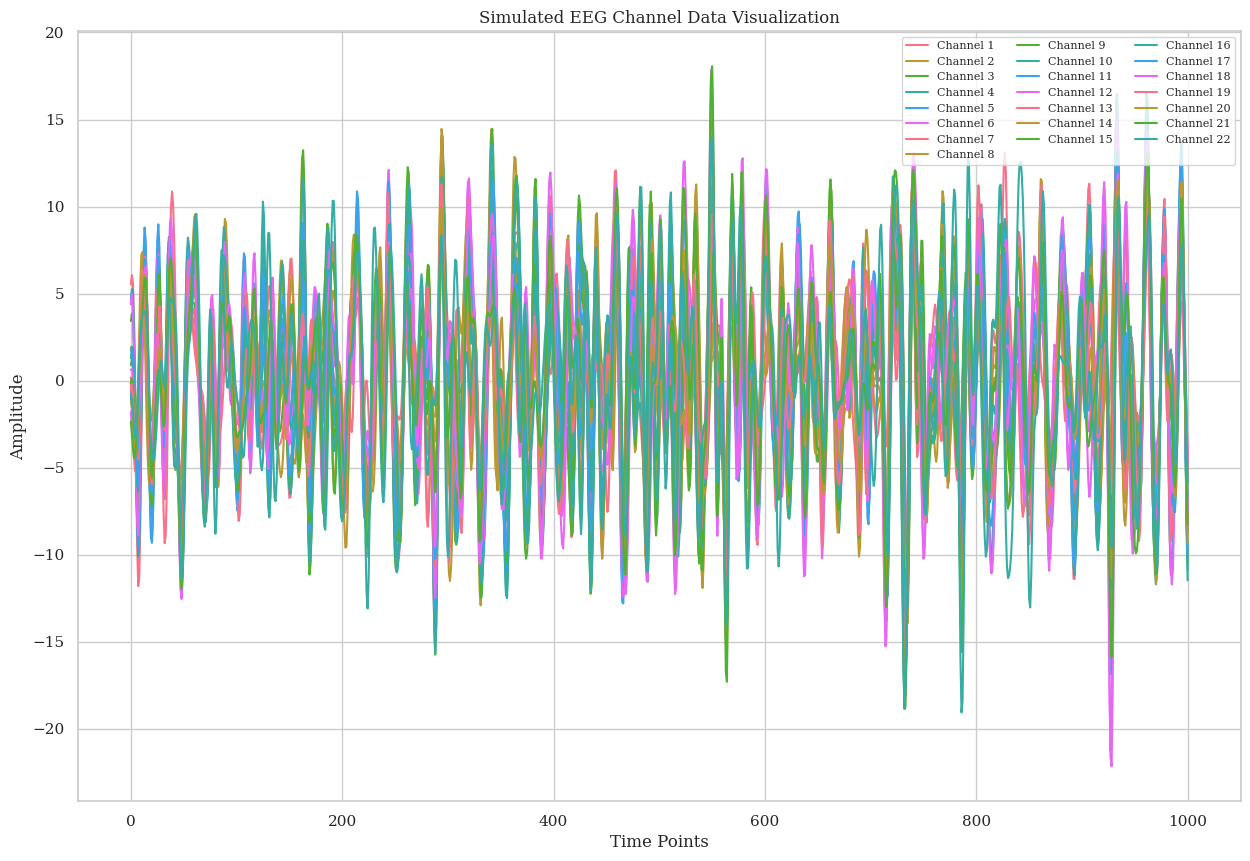

In [5]:

visualize_eeg_weights(X, isSqueezed=False)

In [6]:
weights = convDictionaryModel.spatio_temporal_layers['subject_9'].weight.data
# weights shape: (num_kernels, num_channels, 1, time_points)


In [7]:
import torch

# Average absolute weight across kernels and time points
# Result: importance per channel
channel_importance = weights.abs().mean(dim=(0, 2, 3))  # shape: (num_channels,)

# Sort channels by importance
sorted_channel_importance, channel_indices = torch.sort(channel_importance, descending=True)
print("Channel Importance (Descending):")
for rank, idx in enumerate(channel_indices, start=1):
    print(f"Rank {rank}: Channel {idx.item()+1}, Importance Score: {sorted_channel_importance[rank-1].item()}")


Channel Importance (Descending):
Rank 1: Channel 7, Importance Score: 0.024972541257739067
Rank 2: Channel 2, Importance Score: 0.024389702826738358
Rank 3: Channel 6, Importance Score: 0.024342471733689308
Rank 4: Channel 19, Importance Score: 0.02400769665837288
Rank 5: Channel 1, Importance Score: 0.02381509728729725
Rank 6: Channel 16, Importance Score: 0.023512989282608032
Rank 7: Channel 21, Importance Score: 0.02325069159269333
Rank 8: Channel 13, Importance Score: 0.02298499271273613
Rank 9: Channel 14, Importance Score: 0.022818300873041153
Rank 10: Channel 4, Importance Score: 0.022794287651777267
Rank 11: Channel 8, Importance Score: 0.022766204550862312
Rank 12: Channel 10, Importance Score: 0.022744128480553627
Rank 13: Channel 18, Importance Score: 0.02255852334201336
Rank 14: Channel 12, Importance Score: 0.02247462049126625
Rank 15: Channel 22, Importance Score: 0.022295521572232246
Rank 16: Channel 20, Importance Score: 0.02210451290011406
Rank 17: Channel 9, Importanc

In [8]:
# Average absolute weight across channels and time points
# Result: importance per kernel
kernel_importance = weights.abs().mean(dim=(1, 2, 3))  # shape: (num_kernels,)

# Sort kernels by importance
sorted_kernel_importance, kernel_indices = torch.sort(kernel_importance, descending=True)
print("\nKernel Importance (Descending):")
for rank, idx in enumerate(kernel_indices, start=1):
    print(f"Rank {rank}: Kernel {idx.item()+1}, Importance Score: {sorted_kernel_importance[rank-1].item()}")



Kernel Importance (Descending):
Rank 1: Kernel 24, Importance Score: 0.024024367332458496
Rank 2: Kernel 37, Importance Score: 0.02400548942387104
Rank 3: Kernel 27, Importance Score: 0.023690219968557358
Rank 4: Kernel 6, Importance Score: 0.02348671667277813
Rank 5: Kernel 20, Importance Score: 0.02344009280204773
Rank 6: Kernel 25, Importance Score: 0.023438967764377594
Rank 7: Kernel 39, Importance Score: 0.02333916537463665
Rank 8: Kernel 34, Importance Score: 0.023303991183638573
Rank 9: Kernel 23, Importance Score: 0.0232692938297987
Rank 10: Kernel 21, Importance Score: 0.023209329694509506
Rank 11: Kernel 8, Importance Score: 0.023172305896878242
Rank 12: Kernel 17, Importance Score: 0.02313629351556301
Rank 13: Kernel 7, Importance Score: 0.023106588050723076
Rank 14: Kernel 16, Importance Score: 0.023035958409309387
Rank 15: Kernel 33, Importance Score: 0.0230141319334507
Rank 16: Kernel 14, Importance Score: 0.022996144369244576
Rank 17: Kernel 29, Importance Score: 0.0229

In [9]:
metadata

subject session run
0           1  0train   0
1           1  0train   0
2           1  0train   0
3           1  0train   0
4           1  0train   0
...       ...     ...  ..
5179        9   1test   5
5180        9   1test   5
5181        9   1test   5
5182        9   1test   5
5183        9   1test   5

[5184 rows x 3 columns]

In [10]:
X.shape


(5184, 22, 1001)

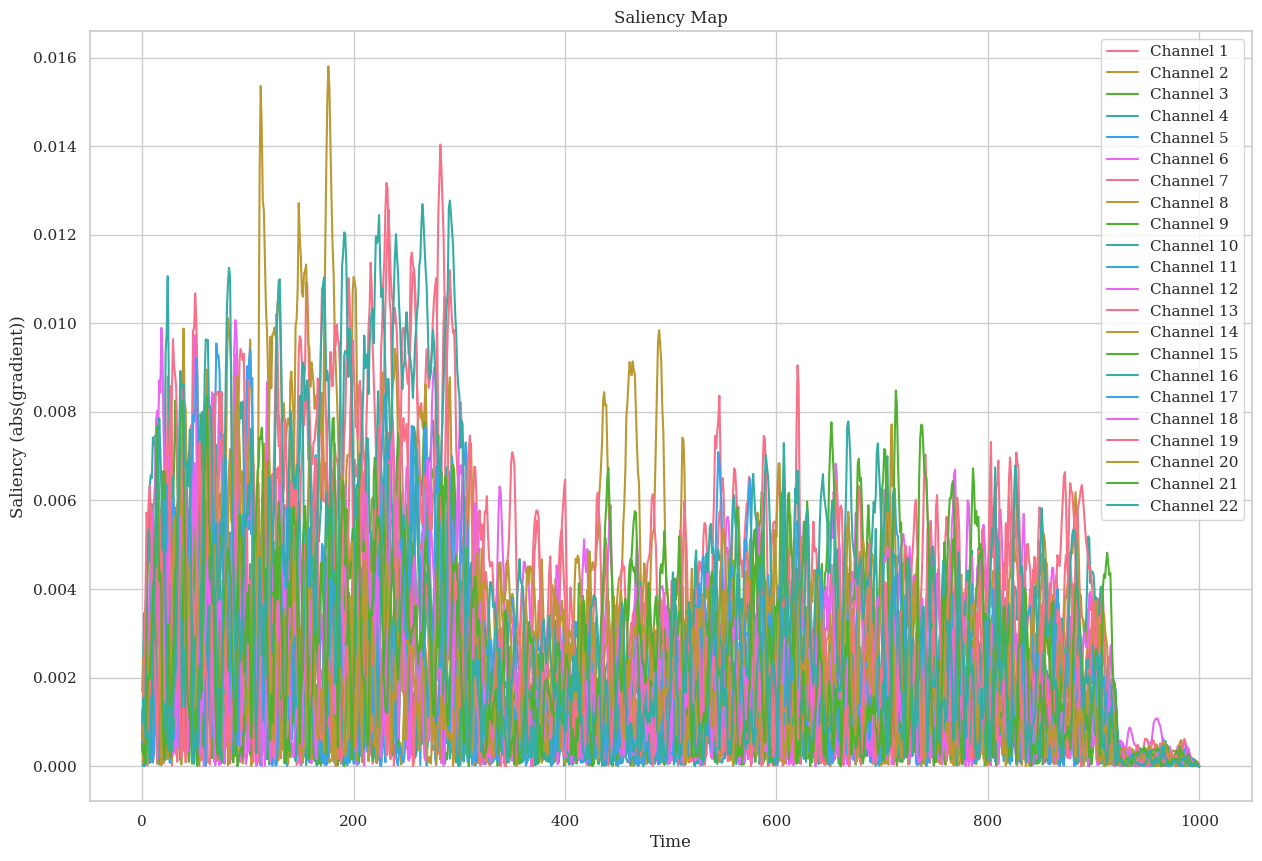

In [11]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

def compute_saliency_map(model, input_data, target_class=None):
    """
    Computes a saliency map for the given input_data and model.

    Args:
        model (nn.Module): The trained model.
        input_data (torch.Tensor): Input EEG data of shape (batch_size, n_chans, n_times) 
                                   plus potentially the subject ID appended. Must be on the same device as the model.
        target_class (int, optional): If specified, compute gradient w.r.t. this class. Otherwise uses predicted class.

    Returns:
        saliency_map (torch.Tensor): The saliency map with shape similar to input_data.
    """
    model.eval()
    
    # add the number 9 to the last time point
    # Copy input_data so we don't modify the original
    # and enable gradient computation
    input_var = input_data.clone().detach().requires_grad_(True)

    # Forward pass
    output = model(input_var)  # shape: (batch_size, n_outputs)

    # If no target_class is provided, use the predicted class of the first sample
    if target_class is None:
        target_class = output.argmax(dim=1)[0].item()

    # Zero out gradients
    model.zero_grad()

    # Backward pass: Compute gradient of the target class score w.r.t. input
    # We pick the first sample in the batch for illustration, i.e., output[0, target_class]
    loss = output[0, target_class]
    loss.backward()

    # Extract gradients from input
    saliency = input_var.grad.data  # shape: (batch_size, n_chans, n_times)
    
    # We might not need the subject ID time point if it's included, so remove it if present:
    # Assuming subject ID is stored at the last time point in the first channel:
    # shape: (batch_size, n_chans, n_times)
    # If the input includes a subject ID in the last time point:
    # input_data: (batch_size, n_chans, n_times+1)
    # We remove the last time point:
    # saliency = saliency[:, :, :-1]

    # Compute absolute value of gradients as saliency
    saliency_map = saliency.abs()

    return saliency_map

# Example usage:
# Assuming you have a trained model `model` and a single EEG input `x`
# x shape should be (1, n_chans, n_times+1) to match your model's expected input
# Make sure x and model are on the same device (CPU or GPU)
# Example: x = next(iter(test_loader))[0]  # Single input sample
# x = x.to(device)
# model.to(device)

#convert numpy  from (22,1001) to (1,22,1001)
x = torch.from_numpy(X[5182]).unsqueeze(0)

# to float
x = x.float()


x[0, :, -1] = 9000000

saliency = compute_saliency_map(convDictionaryModel, x)

# Convert saliency to numpy for plotting
saliency_np = saliency.cpu().numpy()[0]  # shape: (n_chans, n_times)

# Plot saliency for each channel
plt.figure(figsize=(15, 10))
for ch in range(saliency_np.shape[0]):
    plt.plot(saliency_np[ch], label=f'Channel {ch+1}')
plt.title('Saliency Map')
plt.xlabel('Time')
plt.ylabel('Saliency (abs(gradient))')
plt.legend()
plt.show()


In [12]:
y

array(['tongue', 'feet', 'right_hand', ..., 'feet', 'left_hand', 'feet'],
      dtype='<U10')

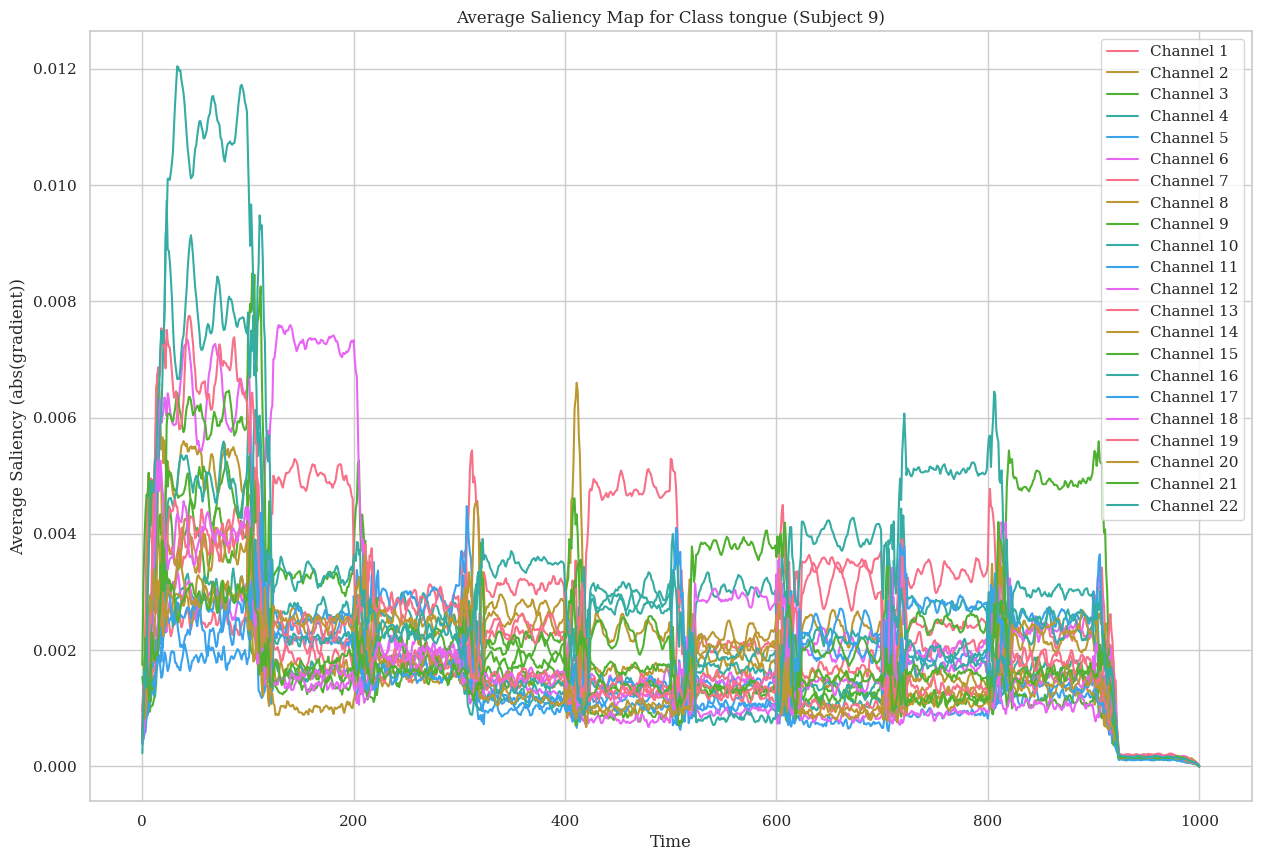

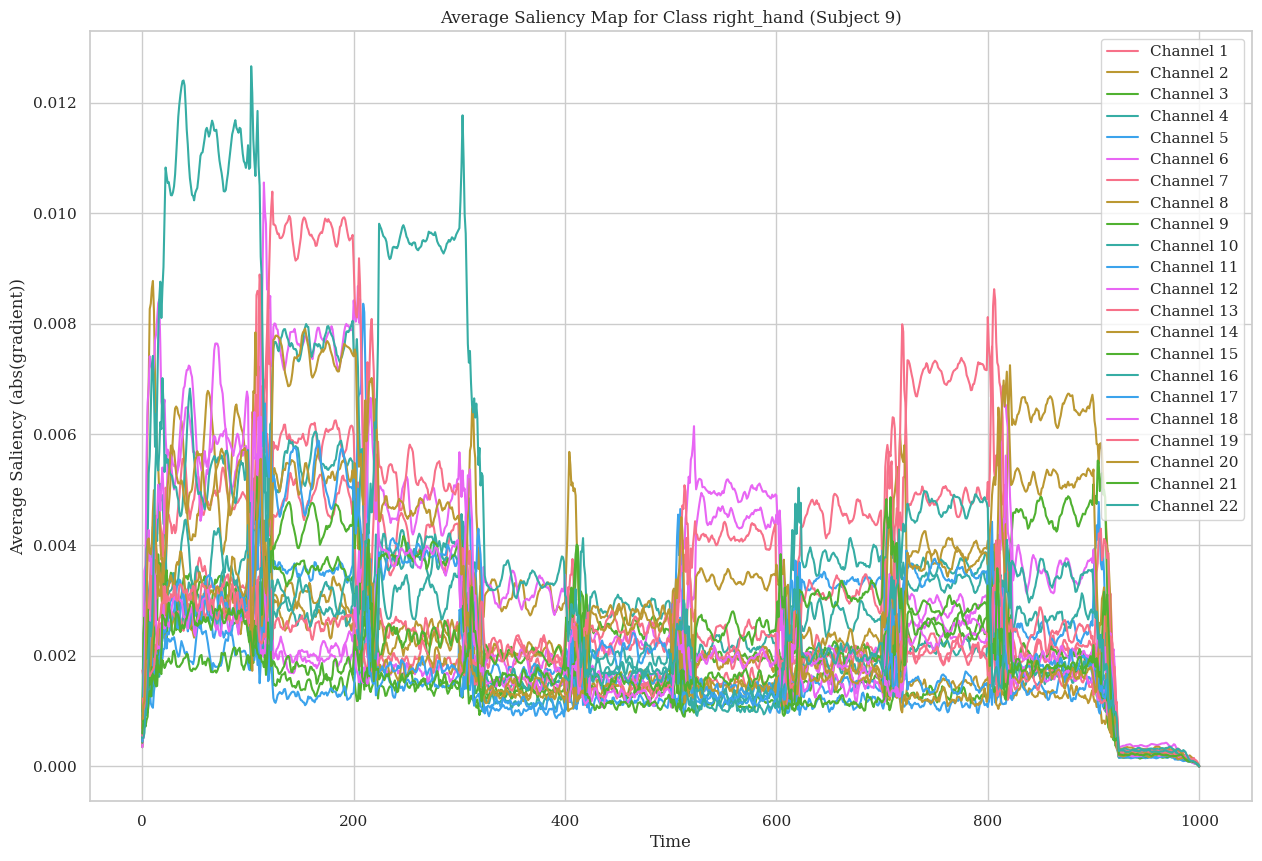

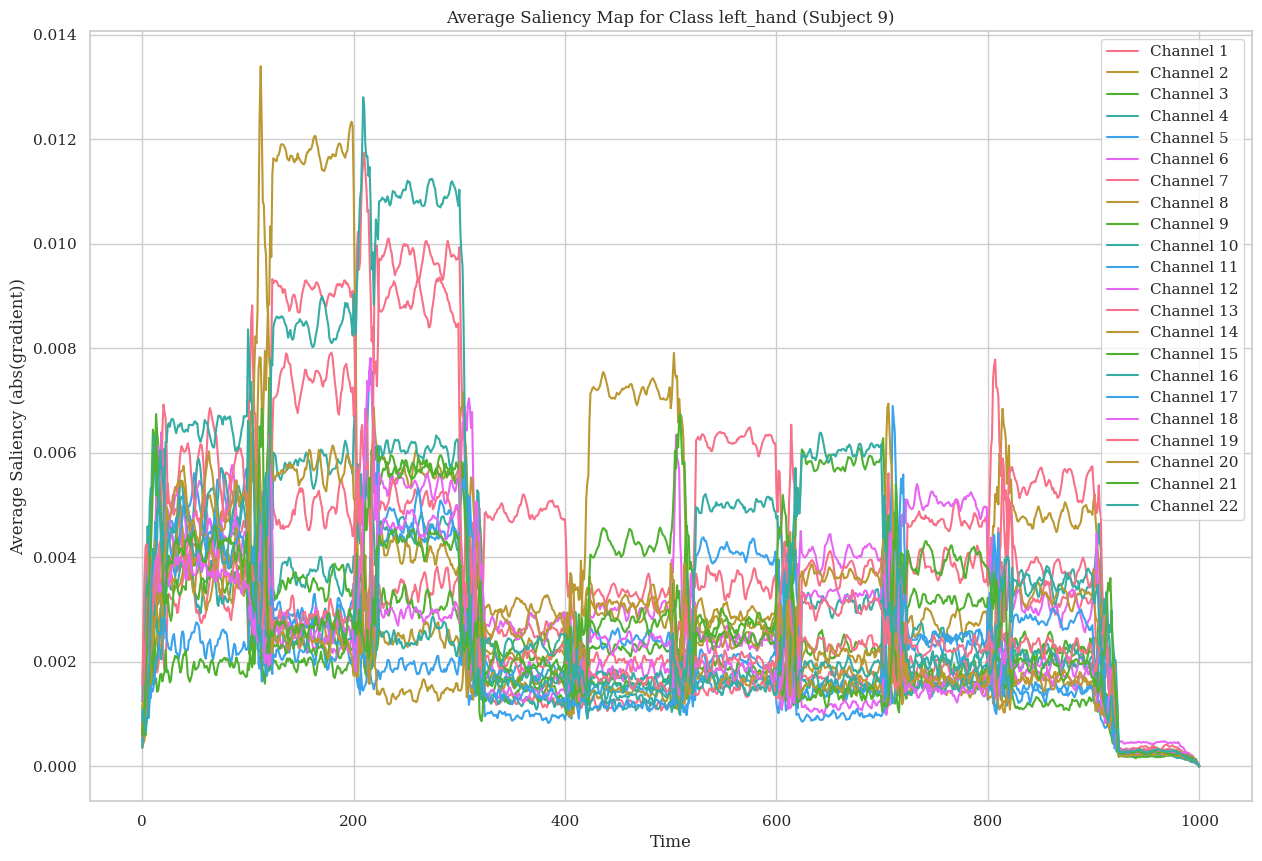

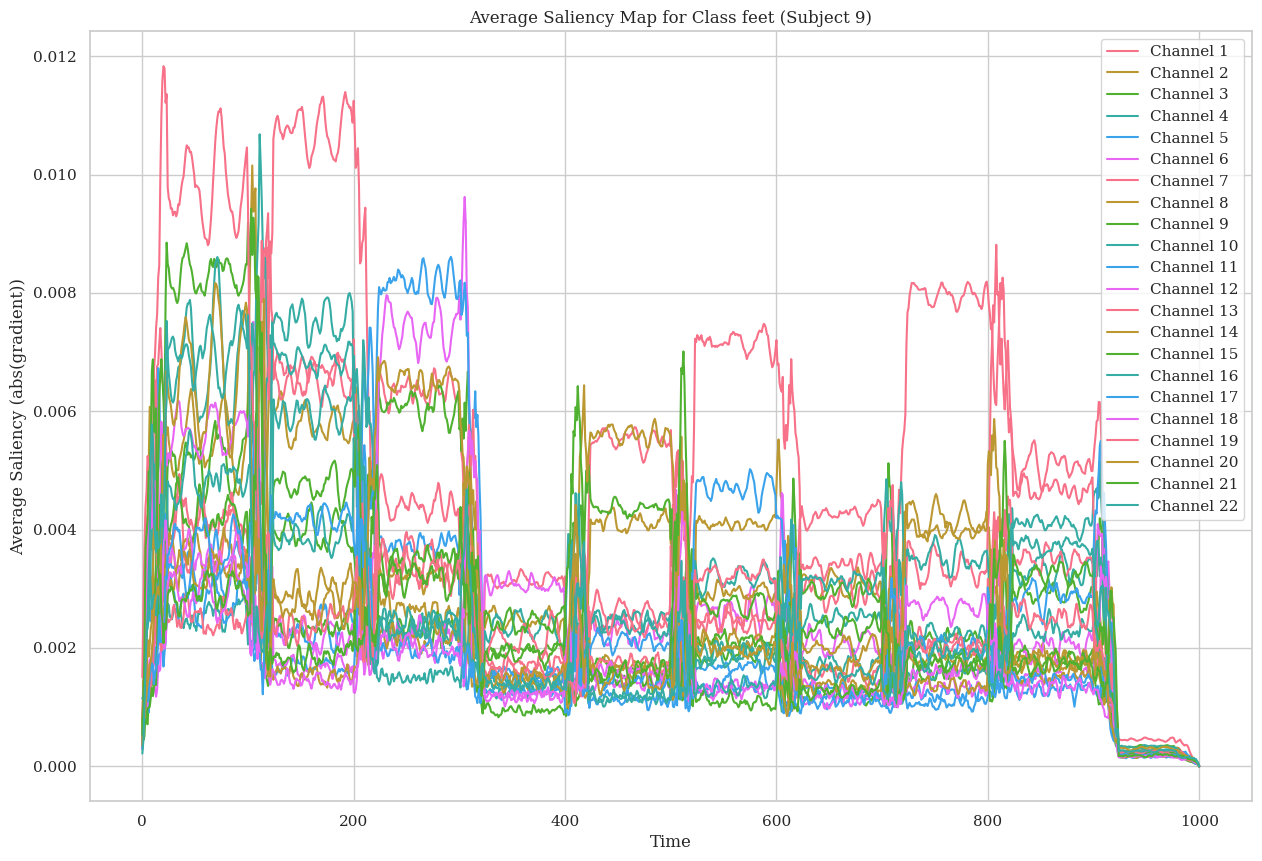

In [14]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
import torch
import numpy as np
import matplotlib.pyplot as plt

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts string labels like 'tongue' into integers

# Map subject 9 indices
subject_9_indices = metadata[metadata['subject'] == 9].index.values

# Dictionary to store saliencies by class
class_saliencies = defaultdict(list)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = convDictionaryModel.to(device)  # Ensure model on correct device
model.eval()

for idx in subject_9_indices:
    # Extract the input data and its class
    sample_x = X[idx]  # shape: (n_channels, n_times+1)
    class_label = y_encoded[idx]  # Get numeric label (encoded)
    
    # Convert input to tensor and move to device
    input_tensor = torch.from_numpy(sample_x).unsqueeze(0).float().to(device)  # shape: (1, n_channels, n_times+1)
    
    # Inject subject ID into last time point's channel 0 if needed
    input_tensor[0, 0, -1] = 9_000_000  # The model expects subject ID scaled by 1,000,000
    
    # Compute saliency map for the given input and its ground truth class label
    saliency_map = compute_saliency_map(model, input_tensor, target_class=class_label)
    
    # Move saliency to CPU and convert to numpy
    saliency_map_np = saliency_map.cpu().numpy()[0]  # shape: (n_chans, n_times)
    
    # Store saliency map by class
    class_saliencies[class_label].append(saliency_map_np)

# Compute the average saliency per class
avg_class_saliencies = {}
for class_label, sal_maps in class_saliencies.items():
    avg_sal = np.mean(sal_maps, axis=0)  # Average across samples dimension
    avg_class_saliencies[class_label] = avg_sal

# Plot the average saliency for each class
for class_label, avg_sal in avg_class_saliencies.items():
    plt.figure(figsize=(15, 10))
    for ch in range(avg_sal.shape[0]):
        plt.plot(avg_sal[ch], label=f'Channel {ch+1}')
    class_name = label_encoder.inverse_transform([class_label])[0]  # Convert back to string
    plt.title(f'Average Saliency Map for Class {class_name} (Subject 9)')
    plt.xlabel('Time')
    plt.ylabel('Average Saliency (abs(gradient))')
    plt.legend()
    plt.show()


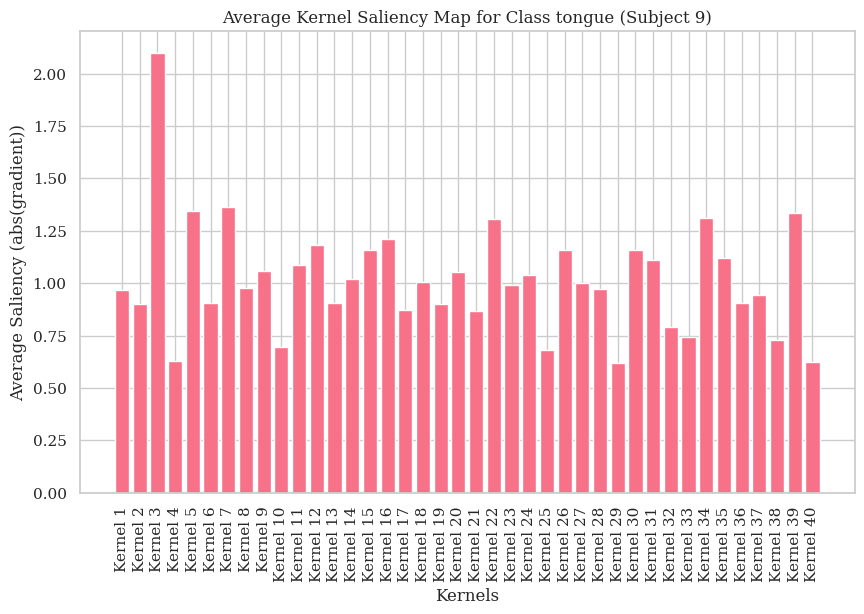

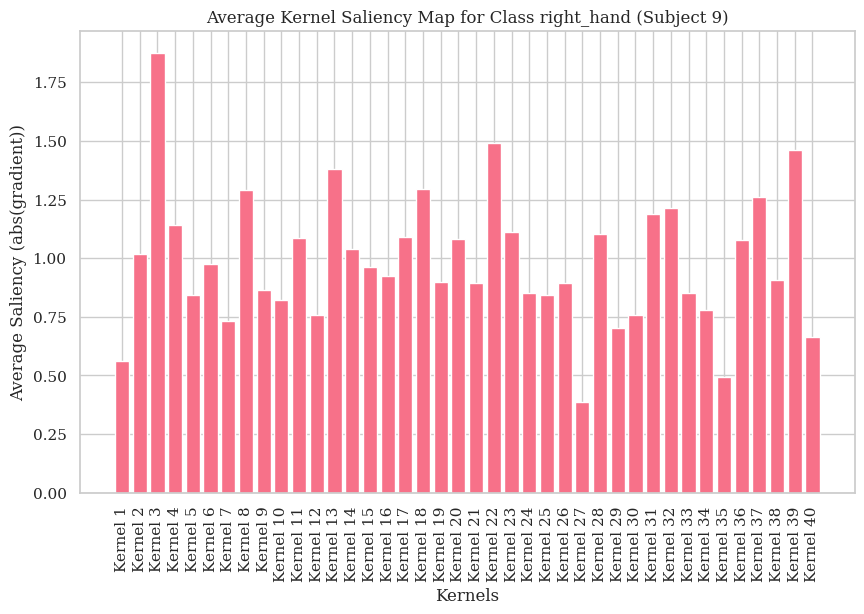

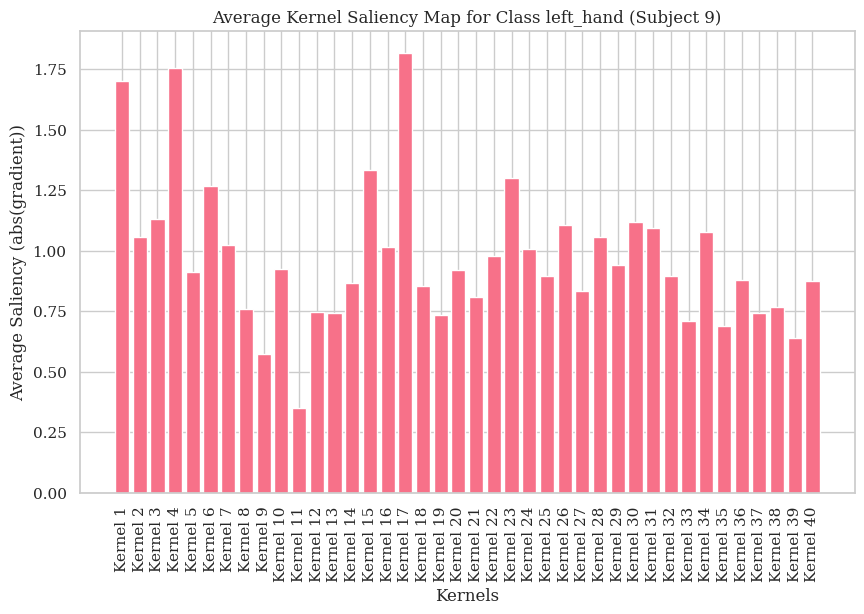

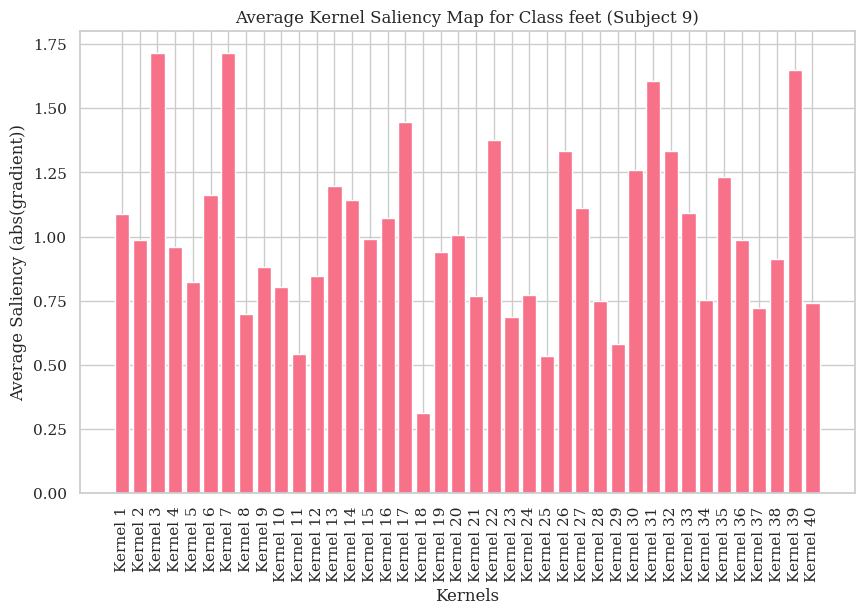

In [15]:
import torch
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from collections import defaultdict

def compute_kernel_saliency_map(model, input_data, target_class=None):
    """
    Computes the saliency map for kernels in the first convolutional layer of the model.
    
    Args:
        model (nn.Module): The trained model.
        input_data (torch.Tensor): Input EEG data of shape (batch_size, n_chans, n_times).
        target_class (int, optional): Target class for which saliency is computed. Uses predicted class if None.
        
    Returns:
        kernel_saliency_map (torch.Tensor): Kernel-level saliency map of shape (num_kernels,).
    """
    model.eval()
    
    # Enable gradient computation for the input data
    input_var = input_data.clone().detach().requires_grad_(True)

    # Forward pass
    output = model(input_var)  # shape: (batch_size, n_outputs)

    # Use the target class or the predicted class
    if target_class is None:
        target_class = output.argmax(dim=1)[0].item()

    # Zero out gradients
    model.zero_grad()

    # Compute gradients of the target class output with respect to the convolutional kernel weights
    loss = output[0, target_class]
    loss.backward()

    # Access gradients for the first convolutional layer for the specific subject
    subject_id = int(input_var[0, 0, -1] / 1_000_000)
    kernel_grads = model.spatio_temporal_layers[f'subject_{subject_id}'].weight.grad  # shape: (num_kernels, n_chans, kernel_size)

    # Compute the saliency map for each kernel as the mean absolute gradient across channels and kernel size
    kernel_saliency_map = kernel_grads.abs().mean(dim=(1, 2))  # shape: (num_kernels,)

    return kernel_saliency_map

# Filter metadata to get indices of subject 9 samples
subject_9_indices = metadata[metadata['subject'] == 9].index.values

# Dictionary to store kernel saliencies by class
class_kernel_saliencies = defaultdict(list)

model = convDictionaryModel.to(device)  # Ensure model on the correct device
model.eval()

for idx in subject_9_indices:
    # Extract the input data and its class
    sample_x = X[idx]  # shape: (n_channels, n_times+1)
    class_label = y[idx]  # Original class label
    
    # Ensure the class label is numeric
    class_label = int(label_encoder.transform([class_label])[0])  # Convert string to numeric label

    # Convert input to tensor and move to device
    input_tensor = torch.from_numpy(sample_x).unsqueeze(0).float().to(device)  # shape: (1, n_channels, n_times+1)
    
    # Inject subject ID into the last time point's channel 0 if needed
    input_tensor[0, 0, -1] = 9_000_000  # The model expects subject ID scaled by 1,000,000
    
    # Compute kernel saliency map for the given input and its ground truth class label
    kernel_saliency_map = compute_kernel_saliency_map(model, input_tensor, target_class=class_label)
    
    # Move saliency map to CPU and convert to numpy
    kernel_saliency_map_np = kernel_saliency_map.cpu().numpy()  # shape: (num_kernels,)
    
    # Store kernel saliency map by class
    class_kernel_saliencies[class_label].append(kernel_saliency_map_np)

avg_class_kernel_saliencies = {}
for class_label, kernel_maps in class_kernel_saliencies.items():
    # Average across samples dimension and kernel size
    avg_sal = np.mean(kernel_maps, axis=0).mean(axis=-1)  # Average across kernel size (last dimension)
    avg_class_kernel_saliencies[class_label] = avg_sal

# Plot the average kernel saliency for each class
for class_label, avg_sal in avg_class_kernel_saliencies.items():
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(avg_sal)), avg_sal, tick_label=[f'Kernel {i+1}' for i in range(len(avg_sal))])
    class_name = label_encoder.inverse_transform([class_label])[0]  # Convert back to string
    plt.title(f'Average Kernel Saliency Map for Class {class_name} (Subject 9)')
    plt.xlabel('Kernels')
    plt.ylabel('Average Saliency (abs(gradient))')
    plt.xticks(rotation=90)
    plt.show()



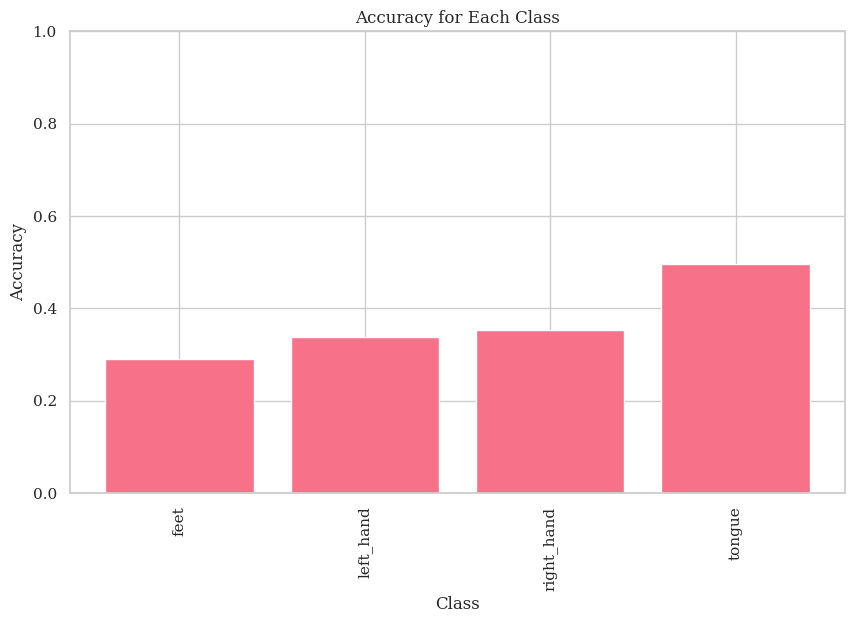

In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Encode labels into integers
y_true = label_encoder.fit_transform(y)  # Encode true labels to numeric values

# Perform predictions for the entire dataset
model.eval()
y_pred = []
for idx in range(len(X)):  # Assuming `X` contains all input samples
    sample_x = torch.from_numpy(X[idx]).unsqueeze(0).float().to(device)  # Single input tensor
    sample_x[0, 0, -1] = 2_000_000  # Example of a fixed subject ID if required
    output = model(sample_x)  # Forward pass
    y_pred.append(output.argmax(dim=1).item())

# Convert predictions to numpy array
y_pred = np.array(y_pred)

# Check alignment
assert len(y_true) == len(y_pred), "Mismatch between y_true and y_pred lengths"

# Get unique class labels
class_labels = np.unique(y_true)

# Compute accuracy for each class
class_accuracies = {}
for class_label in class_labels:
    # Filter for the current class
    class_indices = np.where(y_true == class_label)[0]
    class_y_true = y_true[class_indices]
    class_y_pred = y_pred[class_indices]
    
    # Compute accuracy for this class
    class_accuracies[class_label] = accuracy_score(class_y_true, class_y_pred)

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.bar(
    [label_encoder.inverse_transform([class_label])[0] for class_label in class_accuracies.keys()],
    class_accuracies.values()
)
plt.title("Accuracy for Each Class")
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()
